# HELLO FRESH BEFR

### *The data is from 1st July 2016 to 26 June 2018. The first part looks at the data as a whole, while the second part looks at it from month to month.*

In [24]:
#packages
import pandas as pd
import csv
import matplotlib as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import glob
import pycountry
from datetime import datetime

#chaning the number of columns that are displayed. get will tell you how much. 
pd.set_option("display.max_columns",50)
sns.set_style("darkgrid")

pd.options.mode.chained_assignment = None

In [25]:
##### Cleaning

df_asl=pd.read_excel("lt_asl.xlsx")

#dropping columns
df_asl.drop(columns=["id","status","real_budget","start_date","end_date","url","ad_set_campaign_id",
                       "margin_percentage","facebook_ad_set_id","facebook_ad_account_id","facebook_business_id",
                       "short_url","ad_url_domain_id"], inplace=True)

#1. FIX CTR
# no fix needed
df_asl["ctr"] = df_asl["ctr"].round(2)

#2. FIX CPC
#def roo(x):
#    if x["cpc"] >= 1 and x["cpc"] < 1000000:
#        return(x["cpc"]/100000)
#    if x["cpc"] >= 1000000:
#        return(x["cpc"]/1000000)
#    else:
#        return(x["cpc"])
#df_asl["cpc"] = df_asl.apply(roo, axis=1)
#df_asl["cpc"] = df_asl["cpc"].round(2)

#3. FIX CPM
#def coo(x):
#    if x["cpm"] >= 1:
#        return(x["cpm"]/1000000)
#    else:
#        return(x["cpm"])
#df_asl["cpm"] = df_asl.apply(coo, axis=1)
#df_asl["cpm"] = df_asl["cpm"].round(2)

#4. No fix for CR needed.

#5. FIX CPA
#def too(x):
#    if x["cpa"] >= 1:
#        return(x["cpa"]/1000000)
#    else:
#        return(x["cpa"])
#df_asl["cpa"] = df_asl.apply(too, axis=1)
#df_asl["cpa"] = df_asl["cpa"].round(2)

#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_asl["marginP"] = df_asl.apply(woo, axis=1)
df_asl["marginP"] = df_asl["marginP"].round(2)

# 1. Lifetime

## 1.1 Margin %

### *Top Performing Campaigns*

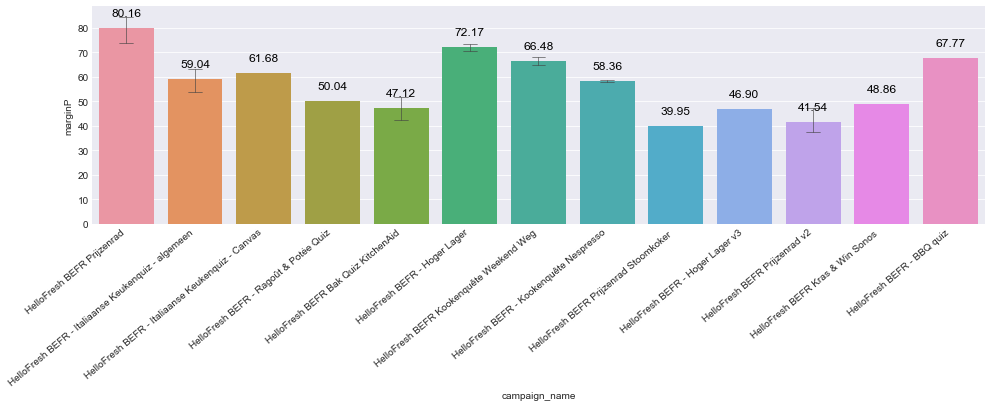

In [26]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="marginP", data=df_asl.nlargest(30,'margin'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

### *Worst Performing Campaigns*

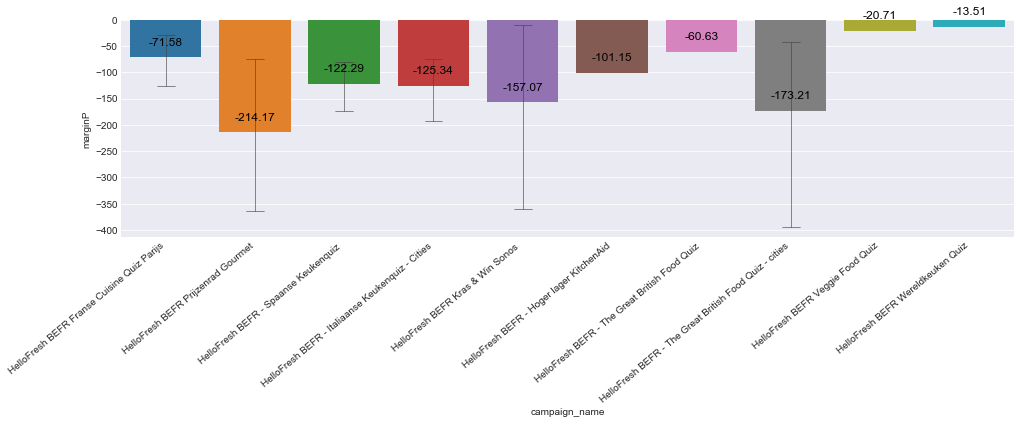

In [27]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="marginP", data=df_asl.nsmallest(30,'margin'), capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

In [28]:
#total by campaign
df_asl['total']=1
df_asl_group=df_asl.groupby(by=['campaign_name']).sum()

## 1.2 Margin

### *Top Performing Campaigns*

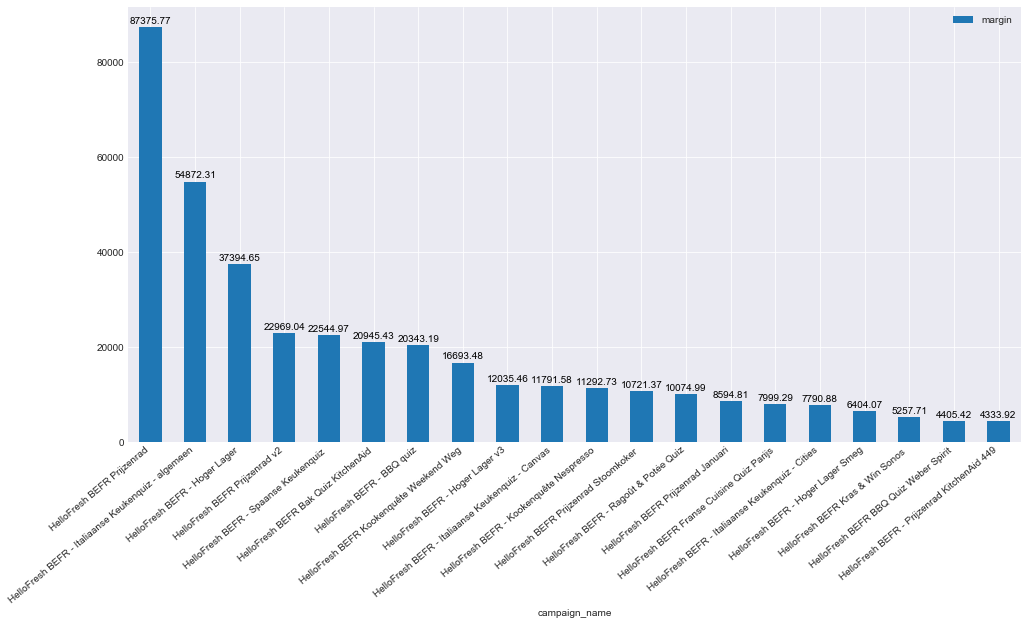

In [29]:
pa=df_asl_group[["margin"]].nlargest(20,'margin').plot(kind="bar", figsize=(16,8))
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
for p in pa.patches:
             pa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=10, color="black", xytext=(0, 6),
                 textcoords="offset points")

### *Worst Performing Campaigns*

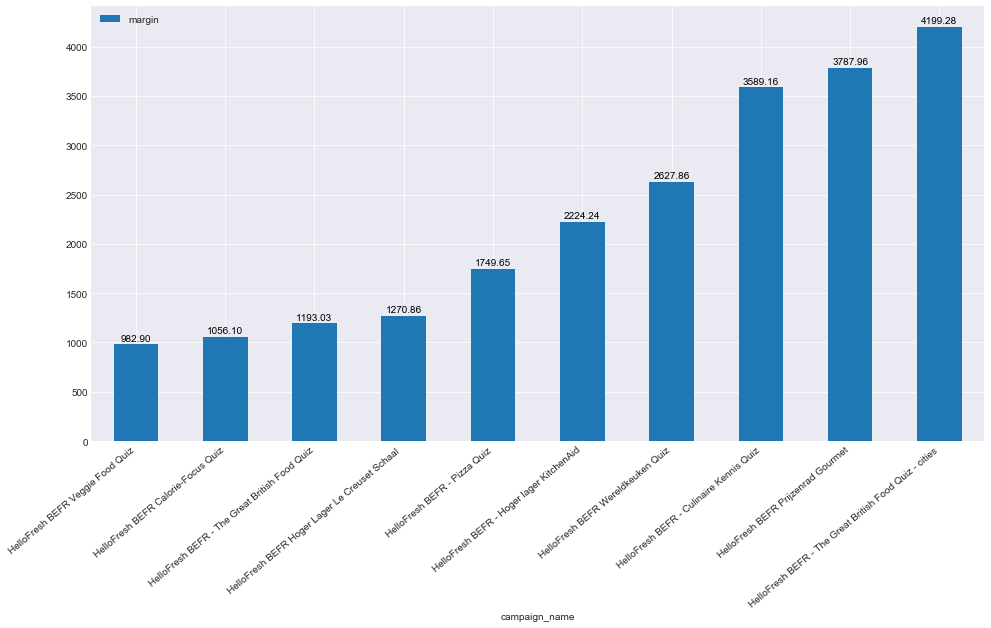

In [30]:
pa=df_asl_group[["margin"]].nsmallest(10,'margin').plot(kind="bar", figsize=(16,8))
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
for p in pa.patches:
             pa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=10, color="black", xytext=(0, 6),
                 textcoords="offset points")

## 1.3 CTR

*average CTR per campaign*

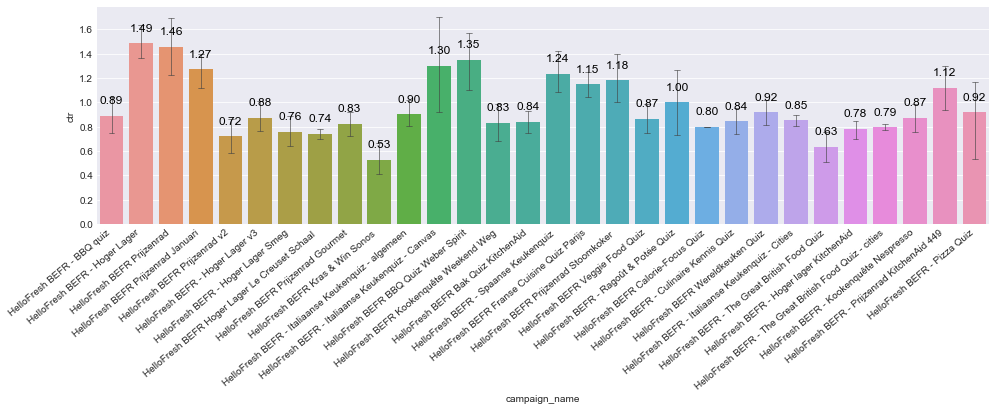

In [31]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="ctr", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.4 CPC

*average CPC per campaign*

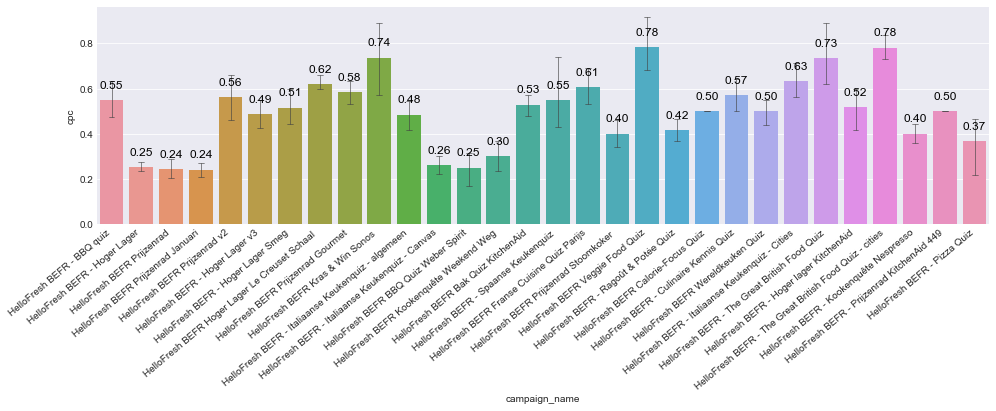

In [32]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cpc", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.5 CPM

*average CPM per month*

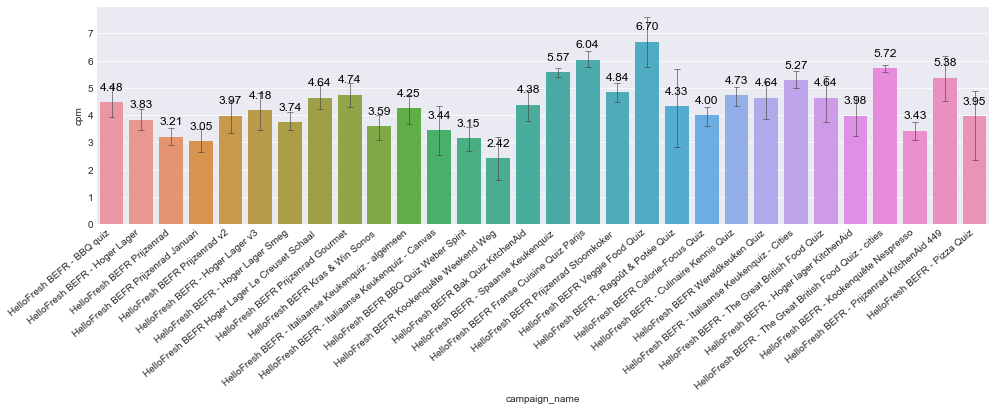

In [33]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cpm", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.6 CR

*average CR per game*

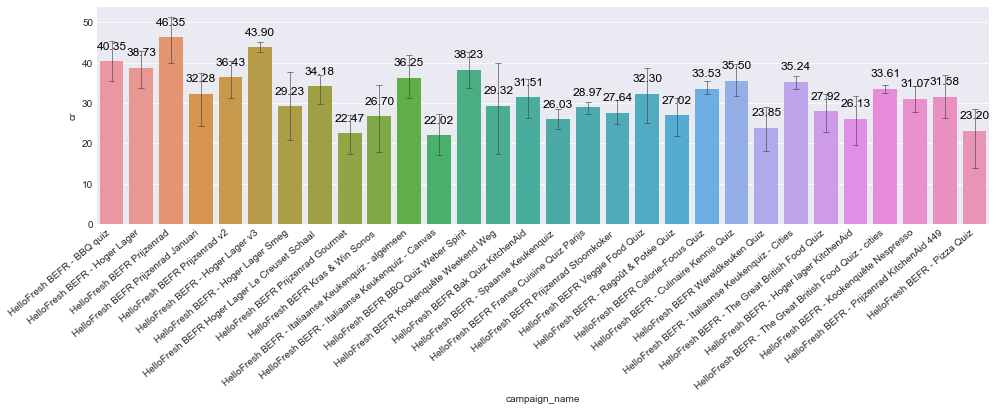

In [34]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cr", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

## 1.7 CPA

*average CPA per campaign*

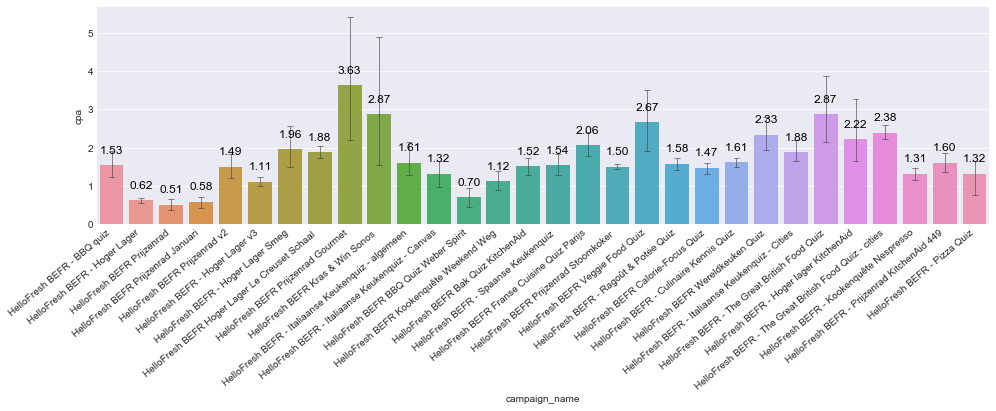

In [35]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="campaign_name", y="cpa", data=df_asl, capsize=.2, errwidth=.6)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=12, color="black", xytext=(0, 15),
                 textcoords="offset points")

______

# 2. Month by Month

In [36]:
#importing multiple files using glob
#getting bert data
sheetnames=glob.glob("m_*.xlsx")
list_of_dfs = [pd.read_excel(sheet) for sheet in sheetnames]
for dataframe, sheet in zip(list_of_dfs, sheetnames):
    dataframe["mon_raw"] = sheet
df_monthly = pd.concat(list_of_dfs, ignore_index=True) 

In [37]:
#dropping unused columns
df_monthly.drop(columns=["id","ad_set_campaign_id","status","margin_percentage","currency","facebook_business_id",
                     "real_budget","revenue_type","facebook_ad_set_id","facebook_ad_account_id","start_date",
                     "end_date","short_url","ad_url_domain_id","url"], inplace=True)

#1. FIX CTR
#def foo(x):
#    if x["ctr"] >= 1:
#        return(x["ctr"]/10000)
#    else:
#        return(x["ctr"])
#df_monthly["ctr"] = df_monthly.apply(foo, axis=1)
#df_monthly["ctr"] = df_monthly["ctr"].round(2)

#2. FIX CPC
def roo(x):
    if x["cpc"] >= 1 and x["cpc"] < 1000000:
        return(x["cpc"]/100000)
    if x["cpc"] >= 1000000:
        return(x["cpc"]/1000000)
    else:
        return(x["cpc"])
df_monthly["cpc"] = df_monthly.apply(roo, axis=1)
df_monthly["cpc"] = df_monthly["cpc"].round(2)

#3. FIX CPM
#def coo(x):
#    if x["cpm"] >= 1:
#        return(x["cpm"]/1000000)
#    else:
#        return(x["cpm"])
#df_monthly["cpm"] = df_monthly.apply(coo, axis=1)
#df_monthly["cpm"] = df_monthly["cpm"].round(2)

#4. FIX CR
#not needed for this dataset
#df_monthly["cr"] = df_monthly["cr"]/10000
#df_monthly["cr"] = df_monthly["cr"].round(2)

#5. FIX CPA
#def too(x):
#    if x["cpa"] >= 1:
#        return(x["cpa"]/1000000)
#    else:
#        return(x["cpa"])
#df_monthly["cpa"] = df_monthly.apply(too, axis=1)
#df_monthly["cpa"] = df_monthly["cpa"].round(2)

#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_monthly["marginP"] = df_monthly.apply(woo, axis=1)
df_monthly["marginP"] = df_monthly["marginP"].round(2)

df_monthly["month"] = df_monthly["mon_raw"].str.split("_").str[1]
df_monthly.drop(columns=["mon_raw"], inplace=True)

In [38]:
order=["16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec",
       "17 Jan","17 Feb","17 Mar","17 Apr","17 May","17 Jun","17 Jul","17 Aug","17 Sep","17 Oct","17 Nov","17 Dec",
       "18 Jan","18 Feb","18 Mar","18 Apr","18 May","18 Jun"]

## 2.1 Average Margin % per Ad

The month with the highest average margin % per ad was December 2016 at 83.64  
The month with the lowest average margin % per ad was May 2018 at -34.05

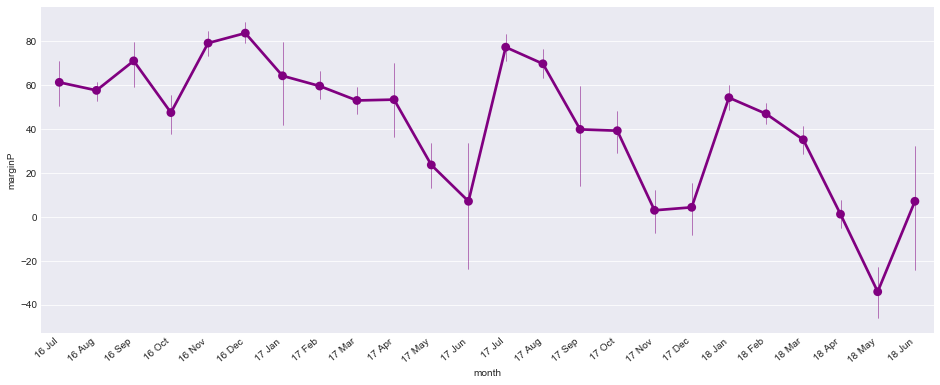

In [39]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="marginP", color="purple", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [40]:
df_monthly['total']=1
df_monthly_total=df_monthly.groupby(by=['month']).sum()
df_monthly_total["margin_%"]=(df_monthly_total["margin"]/df_monthly_total["revenue"])*100
df_monthly_total["margin_%"]=df_monthly_total["margin_%"].round(2)
df_monthly_total["Month"]=df_monthly_total.index

## 2.2 Total Margin % Per Month

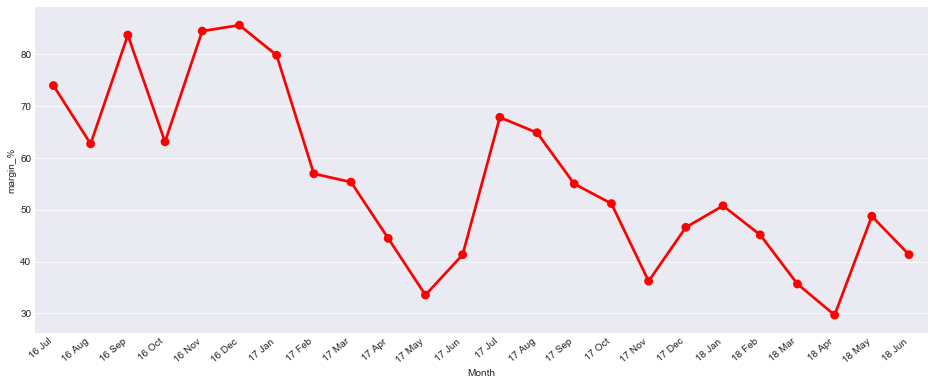

In [41]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="Month", y="margin_%", color="red", errwidth=.5, data=df_monthly_total, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.3 Total Margin Per Month

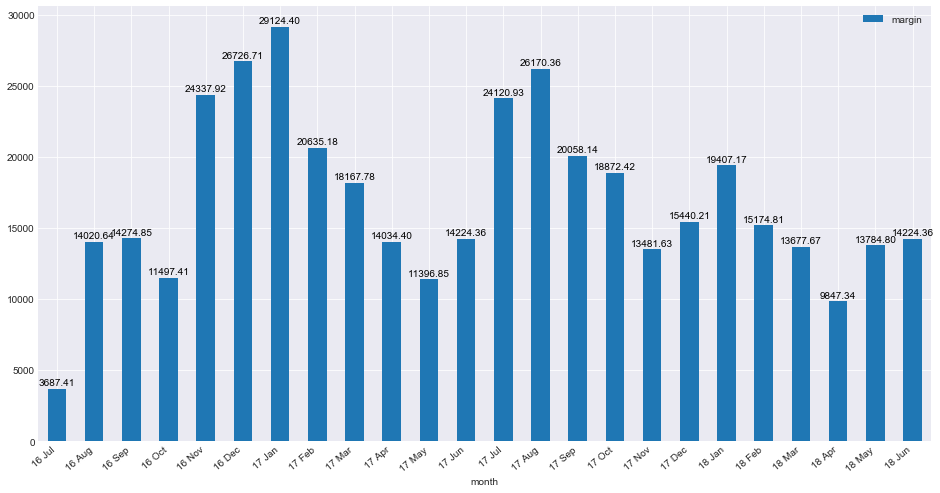

In [42]:
pa=df_monthly_total[["margin"]].loc[order].plot(kind="bar", figsize=(16,8))
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
for p in pa.patches:
             pa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=10, color="black", xytext=(0, 6),
                 textcoords="offset points")

## 2.4 CTR

*average CTR per ad* 

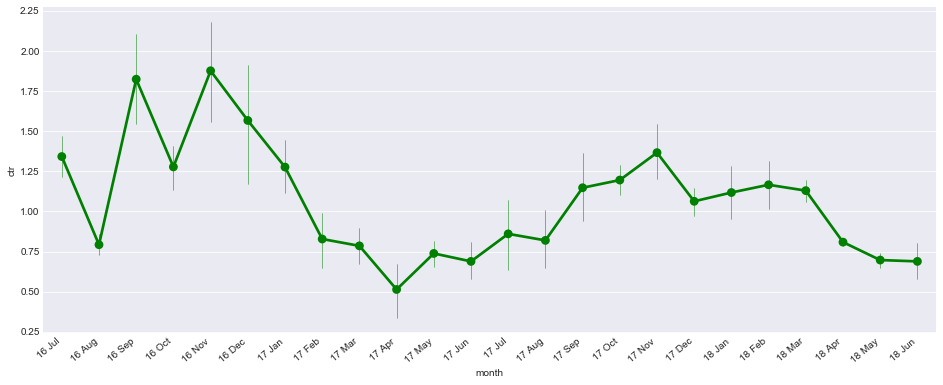

In [43]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="ctr", color="G", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.5 CPC

*average CPC per ad*

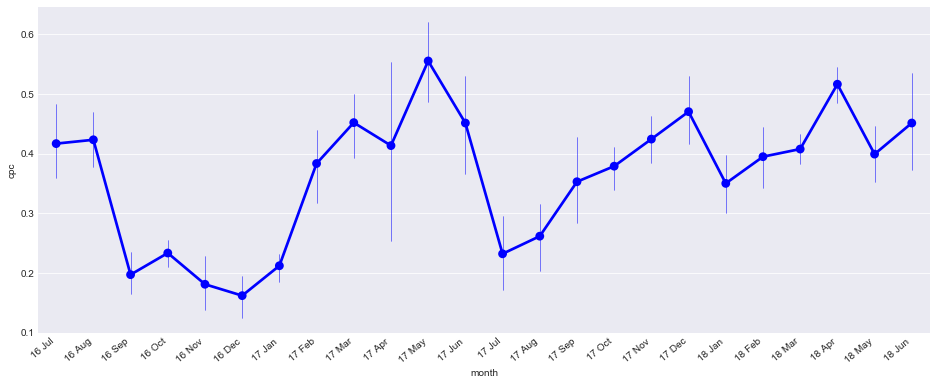

In [44]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpc", color="B", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.6 CPM

*average CPM per ad*

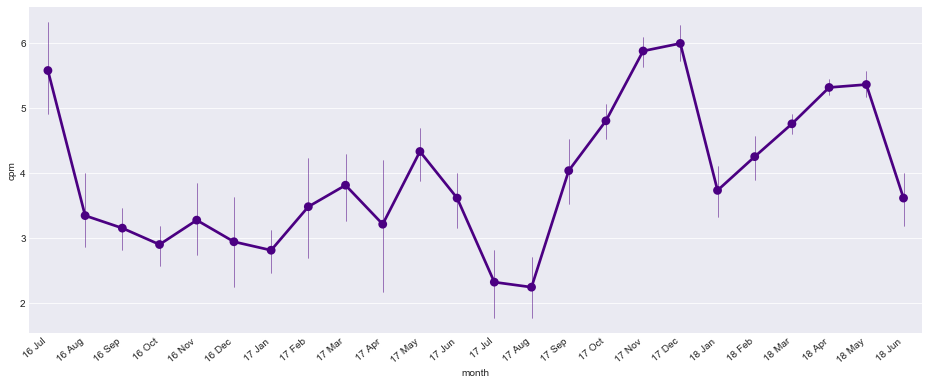

In [45]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpm", color="indigo", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.7 CR

*average CR per ad*

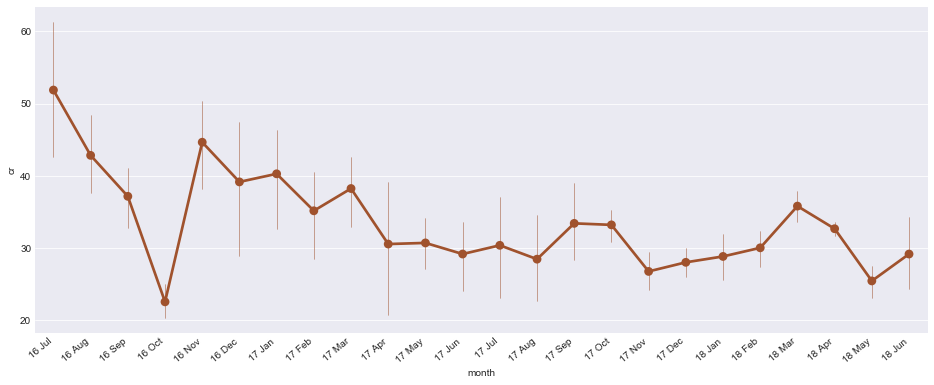

In [46]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cr", color="sienna", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

## 2.8 CPA

*average CPA per ad*

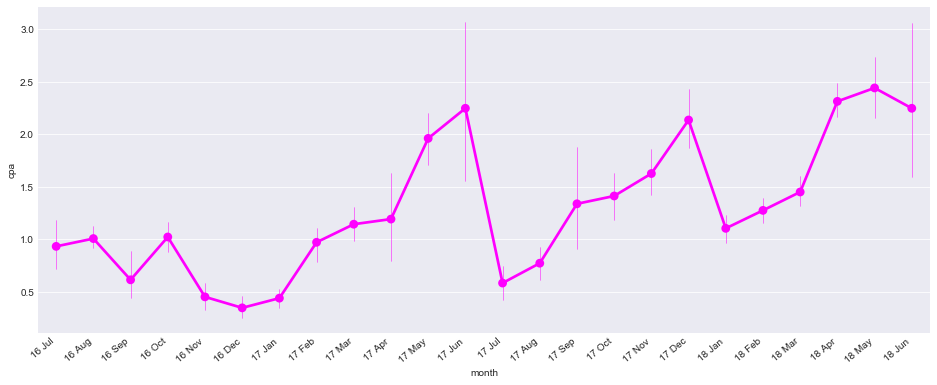

In [47]:
plt.pyplot.figure(figsize=(16,6))
ha=sns.pointplot(x="month", y="cpa", color="magenta", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [48]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>